split augmented data to train & test set. 
strategy: for each speaker, take one random audio

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# load train data

full_train_path = '/home/thivux/code/vinai/zstts/split_long_audio/metadata/step20_train.csv'
cols = ['path', 'text', 'speaker', 'duration']
full_train = pd.read_csv(full_train_path, sep='|', names=cols)
print(full_train.shape)
full_train.head()


(1033472, 4)


,path,text,speaker,duration
0,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,tôn kính thần linh. hay là họ là những con ngư...,Nguyễn_Văn_Khỏa,12.998563
1,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,không phải là người biết ăn bánh mì. chúng sốn...,Nguyễn_Văn_Khỏa,11.391688
2,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,ta sẽ chẳng xin phúc tha cho mày và đồng bọn c...,Nguyễn_Văn_Khỏa,10.878250
3,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,từ ngoài khơi. khi con thuyền đã cần cập bến n...,Nguyễn_Văn_Khỏa,10.393875
4,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,"giết chết hắn rồi, nhưng làm sao mà vần được c...",Nguyễn_Văn_Khỏa,10.795188


In [9]:
full_train['duration'].sum() / 3600

1479.6447678924987

In [15]:
# randomly sample 10000 audio from full_train
sampled_train = full_train.sample(10000)
# deep copy sampled_train to avoid modifying the original dataframe
val = sampled_train.copy()
sampled_train['duration'].sum() / 3600

14.421522816388888

/tmp/ipykernel_130312/1059525318.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_sums = sampled_train.groupby('duration_group')['duration'].sum() / 3600


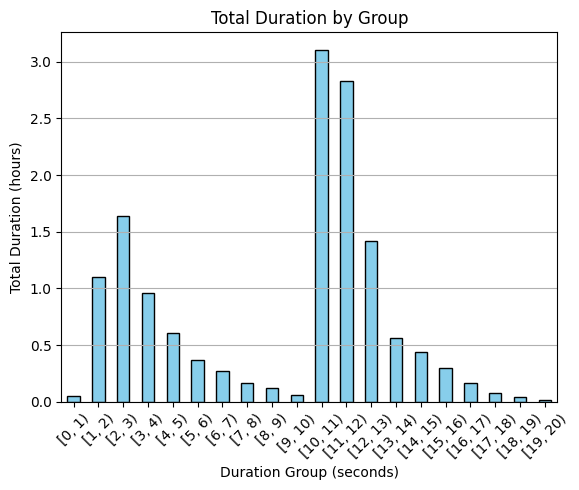

In [10]:
sampled_train['duration_group'] = pd.cut(sampled_train['duration'], bins=range(0, 21), right=False)

# Group by 'duration_group' and sum the durations
duration_sums = sampled_train.groupby('duration_group')['duration'].sum() / 3600

# Plot the bar chart
duration_sums.plot(kind='bar', color='skyblue', edgecolor='black')
# add grid lines to make it easier to see value of each column
plt.grid(axis='y')
plt.xlabel('Duration Group (seconds)')
plt.ylabel('Total Duration (hours)')
# make y tick every 10 hours
# plt.yticks(np.arange(0, 180, 10))
plt.title('Total Duration by Group')
plt.xticks(rotation=45)
plt.show()

In [16]:
# create train set which exclude sampled_train
train = full_train[~full_train['path'].isin(sampled_train['path'])]
print(train.shape)
train.head()


(1033472, 4)


,path,text,speaker,duration
0,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,tôn kính thần linh. hay là họ là những con ngư...,Nguyễn_Văn_Khỏa,12.998563
1,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,không phải là người biết ăn bánh mì. chúng sốn...,Nguyễn_Văn_Khỏa,11.391688
2,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,ta sẽ chẳng xin phúc tha cho mày và đồng bọn c...,Nguyễn_Văn_Khỏa,10.878250
3,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,từ ngoài khơi. khi con thuyền đã cần cập bến n...,Nguyễn_Văn_Khỏa,10.393875
4,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,"giết chết hắn rồi, nhưng làm sao mà vần được c...",Nguyễn_Văn_Khỏa,10.795188


In [17]:
train.shape

(1033472, 4)

In [18]:
val.shape

(10000, 4)

In [12]:
# save train to csv
train.to_csv('/home/thivux/code/vinai/zstts/split_long_audio/metadata/step20_train.csv', sep='|', header=False, index=False)

# save sampled_train to val csv
sampled_train.to_csv('/home/thivux/code/vinai/zstts/split_long_audio/metadata/step20_val.csv', sep='|', header=False, index=False)

In [24]:
# create train & val for xtts. column name: audio_file|text|speaker_name

train_xtts = train[['path', 'text', 'speaker']]
val_xtts = sampled_train[['path', 'text', 'speaker']]

train_xtts.to_csv('/home/thivux/code/vinai/zstts/split_long_audio/metadata/step20_train_xtts.csv', sep='|', header=['audio_file', 'text', 'speaker_name'], index=False)
val_xtts.to_csv('/home/thivux/code/vinai/zstts/split_long_audio/metadata/step20_val_xtts.csv', sep='|', header=['audio_file', 'text', 'speaker_name'], index=False)

### problem: train & val split for xtts and voicecraft are different
solution: use xtts split as reference, and split voicecraft accordingly

In [23]:
# does xtts have the same split as voicecraft? 
val_path = '/home/thivux/code/vinai/zstts/split_long_audio/metadata/step20_val.csv'
val_data = pd.read_csv(val_path, sep='|', header=None, names=['audio_path', 'transcript', 'speaker', 'duration'])

val_xtts_path = '/home/thivux/code/vinai/zstts/split_long_audio/metadata/step20_val_xtts.csv'
val_xtts_data = pd.read_csv(val_xtts_path, sep='|')


False

In [25]:
# load train_xtts and val_xtts
train_xtts_path = '/home/thivux/code/vinai/zstts/split_long_audio/metadata/step20_train_xtts.csv'
train_xtts = pd.read_csv(train_xtts_path, sep='|')

val_xtts_path = '/home/thivux/code/vinai/zstts/split_long_audio/metadata/step20_val_xtts.csv'
val_xtts = pd.read_csv(val_xtts_path, sep='|')

# train_data is the subset of full_train that have paths in train_xtts
train_data = full_train[full_train['path'].isin(train_xtts['audio_file'])]

# same for val data
val_data = full_train[full_train['path'].isin(val_xtts['audio_file'])]

print(train_data.shape)
train_data.head()


(1033472, 4)


,path,text,speaker,duration
0,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,tôn kính thần linh. hay là họ là những con ngư...,Nguyễn_Văn_Khỏa,12.998563
1,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,không phải là người biết ăn bánh mì. chúng sốn...,Nguyễn_Văn_Khỏa,11.391688
2,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,ta sẽ chẳng xin phúc tha cho mày và đồng bọn c...,Nguyễn_Văn_Khỏa,10.878250
3,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,từ ngoài khơi. khi con thuyền đã cần cập bến n...,Nguyễn_Văn_Khỏa,10.393875
4,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,"giết chết hắn rồi, nhưng làm sao mà vần được c...",Nguyễn_Văn_Khỏa,10.795188


In [26]:
print(val_data.shape)
val_data.head()

(10000, 4)


,path,text,speaker,duration
67,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,"làm sao lúc nào cũng có, cũng mang theo bên ng...",Nguyễn_Văn_Khỏa,10.655875
129,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,chúng lại cứ tiếp tục vây đánh chúng ta? không...,Nguyễn_Văn_Khỏa,11.160000
154,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,tràn đầy sinh khí. gặp hắn ta cứ tưởng như là ...,Nguyễn_Văn_Khỏa,11.200000
217,big_processed_data/Voiz/Nói_Ít_Lại_Làm_Nhiều_H...,bạn chẳng thể dùng những lời ngụy biện đó để đ...,Voiz,12.279000
238,big_processed_data/Voiz/Nói_Ít_Lại_Làm_Nhiều_H...,"khi bắt đầu nghiên cứu về sự thành công, tôi đ...",Voiz,15.656438


In [27]:
# any overlap between train and val paths
train_paths = set(train_data['path'])
val_paths = set(val_data['path'])
intersection = train_paths.intersection(val_paths)
print(len(intersection))

0


In [29]:
# save new train & val data and then sync to superpod dcm
train_data.to_csv('/home/thivux/code/vinai/zstts/split_long_audio/metadata/step20_train.csv', sep='|', header=False, index=False)
val_data.to_csv('/home/thivux/code/vinai/zstts/split_long_audio/metadata/step20_val.csv', sep='|', header=False, index=False)

In [2]:
# load train & val data and double check the paths
train_path = '/home/thivux/code/vinai/zstts/split_long_audio/metadata/step20_train.csv'
train_data = pd.read_csv(train_path, sep='|', header=None)

val_path = '/home/thivux/code/vinai/zstts/split_long_audio/metadata/step20_val.csv'
val_data = pd.read_csv(val_path, sep='|', header=None)

train_paths = set(train_data[0])
val_paths = set(val_data[0])
intersection = train_paths.intersection(val_paths)
print(len(intersection))

0


In [3]:
def get_segment_id_from_path(filepath): 
    '''
    input: 
        path: 'big_processed_data/Khương_Ngọc_Đình/Hồi_Ký_Của_Các_Tướng_Tá_Sài_Gòn/tuong-ta-3/chunk-4423_22-4426_94.wav'
    output: 
        segment_id from path
    '''
    # return hashlib.md5(filepath.encode()).hexdigest()
    res =  "_".join(filepath.split('/')[3:]).replace('.wav', '').strip()
    return res

# get segment_id from path
train_segment_id = {get_segment_id_from_path(path): path for path in train_paths}
val_segment_id = {get_segment_id_from_path(path):path for path in val_paths}

set(train_segment_id) & set(val_segment_id)

{'2_chunk-11574_72-11577_10',
 '3_chunk-921_80-923_84',
 'Quy-Luat-Bat-Bien-Trong-Kinh-Doanh-P1_chunk-480_46-482_22',
 'Quy-Luat-Bat-Bien-Trong-Kinh-Doanh-P4_chunk-455_6-468_7_trimmed_norm_float32',
 'thang-thua_chunk-1013_62-1017_44',
 'thang-thua_chunk-1267_52-1278_78_trimmed_norm_float32',
 'thang-thua_chunk-1643_60-1645_96',
 'thang-thua_chunk-987_78-991_30'}

In [5]:
import hashlib

def hash_filename(filepath):
    return hashlib.md5(filepath.encode()).hexdigest()
    

In [6]:
# create mapping between old segment_id and new segment_id
train_map = {get_segment_id_from_path(path): hash_filename(path) for path in train_paths}
val_map = {get_segment_id_from_path(path): hash_filename(path) for path in val_paths}


In [7]:
val_map

{'tim-binh-04_chunk-2058_78-2064_72': '86b18c3cedadafd22bb5e9fb3c758e19',
 '01 - Nhìn Thấu Lòng Người Qua Ánh Mắt  - Bạch Sơn_chunk-1675_36-1682_90': '2a6f1c0a407710c7a948f87b7adff288',
 'tham-kich-3_chunk-5602_52-5604_04': '1cccb248d7816e93c00283d43f85e450',
 'mat-ma-1_chunk-3192_68-3194_72': '0c5df947f2e9f1ad46230ea592091f51',
 'chuong 19_chunk-94_12-95_96': 'bb97fa32ac93a253743f070ee88c60df',
 'nhung-con-12_chunk-27_52-43_18_trimmed_norm_float32': '1139e261bbe312fc88b45fd39ffa5157',
 'trai-tim-6_chunk-684_66-695_76_trimmed_norm_float32': '3555de4b4eb643e5eeefab1737f22442',
 'Ngôi Nhà Chánh Niệm  Năng lực thần thông tôi chẳng có Chỉ lấy chân thật làm sức mạnh_chunk-880_38-882_62': 'fd30c2221c5e401b0582f1163285f9ed',
 'Tập 39_ Chân Tướng Vụ Án - truyện PHÁT THANH KHỦNG BỐ _ Truyện Linh Dị Hay Nhất 2022 (192kbit_AAC)_chunk-908_92-919_88_trimmed_norm_float32': '4f65b2635cba3bf613fbf351d168e3a9',
 'tuoi-tre-2_chunk-575_82-578_22': '4859d75191fddd909fda5ecbb30e8481',
 '

## create subset < 5s

In [1]:
import pandas as pd

In [3]:
# load train & val data
train_path = '/home/thivux/code/vinai/zstts/split_long_audio/metadata/step20_train.csv'
train_data = pd.read_csv(train_path, sep='|', header=None, names=['path', 'text', 'speaker', 'duration'])
train_data.head()

,path,text,speaker,duration
0,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,tôn kính thần linh. hay là họ là những con ngư...,Nguyễn_Văn_Khỏa,12.998563
1,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,không phải là người biết ăn bánh mì. chúng sốn...,Nguyễn_Văn_Khỏa,11.391688
2,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,ta sẽ chẳng xin phúc tha cho mày và đồng bọn c...,Nguyễn_Văn_Khỏa,10.878250
3,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,từ ngoài khơi. khi con thuyền đã cần cập bến n...,Nguyễn_Văn_Khỏa,10.393875
4,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,"giết chết hắn rồi, nhưng làm sao mà vần được c...",Nguyễn_Văn_Khỏa,10.795188


In [4]:
val_path = '/home/thivux/code/vinai/zstts/split_long_audio/metadata/step20_val.csv'
val_data = pd.read_csv(val_path, sep='|', header=None, names=['path', 'text', 'speaker', 'duration'])
val_data.head()

,path,text,speaker,duration
0,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,"làm sao lúc nào cũng có, cũng mang theo bên ng...",Nguyễn_Văn_Khỏa,10.655875
1,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,chúng lại cứ tiếp tục vây đánh chúng ta? không...,Nguyễn_Văn_Khỏa,11.160000
2,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,tràn đầy sinh khí. gặp hắn ta cứ tưởng như là ...,Nguyễn_Văn_Khỏa,11.200000
3,big_processed_data/Voiz/Nói_Ít_Lại_Làm_Nhiều_H...,bạn chẳng thể dùng những lời ngụy biện đó để đ...,Voiz,12.279000
4,big_processed_data/Voiz/Nói_Ít_Lại_Làm_Nhiều_H...,"khi bắt đầu nghiên cứu về sự thành công, tôi đ...",Voiz,15.656438


In [5]:
# filter audio with duration < 5s
subset_train = train_data[train_data['duration'] <= 5]
subset_val = val_data[val_data['duration'] <= 5]

In [7]:
# get sum of duration
subset_train['duration'].sum() / 3600
subset_val['duration'].sum() / 3600

4.386197222222221

In [8]:
subset_train_xtts = subset_train[['path', 'text', 'speaker']]
subset_val_xtts = subset_val[['path', 'text', 'speaker']]

subset_train_xtts.to_csv('/home/thivux/code/vinai/zstts/split_long_audio/metadata/step21_short_train_xtts.csv', sep='|', header=['audio_file', 'text', 'speaker_name'], index=False)
subset_val_xtts.to_csv('/home/thivux/code/vinai/zstts/split_long_audio/metadata/step21_short_val_xtts.csv', sep='|', header=['audio_file', 'text', 'speaker_name'], index=False)

## create subset data with good distribution 

- has full data from 1-20s 
- each duration range have the same hours of data

In [3]:
import pandas as pd

# load train & val data
train_path = '/home/thivux/code/vinai/zstts/split_long_audio/metadata/step20_train.csv'
train_data = pd.read_csv(train_path, sep='|', header=None, names=['path', 'text', 'speaker', 'duration'])

val_path = '/home/thivux/code/vinai/zstts/split_long_audio/metadata/step20_val.csv'
val_data = pd.read_csv(val_path, sep='|', header=None, names=['path', 'text', 'speaker', 'duration'])

In [4]:
train_data.head()

,path,text,speaker,duration
0,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,tôn kính thần linh. hay là họ là những con ngư...,Nguyễn_Văn_Khỏa,12.998563
1,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,không phải là người biết ăn bánh mì. chúng sốn...,Nguyễn_Văn_Khỏa,11.391688
2,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,ta sẽ chẳng xin phúc tha cho mày và đồng bọn c...,Nguyễn_Văn_Khỏa,10.878250
3,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,từ ngoài khơi. khi con thuyền đã cần cập bến n...,Nguyễn_Văn_Khỏa,10.393875
4,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,"giết chết hắn rồi, nhưng làm sao mà vần được c...",Nguyễn_Văn_Khỏa,10.795188


In [5]:
df = pd.concat([train_data, val_data], axis=0)

In [6]:
# Define the duration bins (0-1, 1-2, ..., 19-20)
bins = list(range(0, 21))  # 0-1, 1-2, ..., 19-20

# Create a new column with the duration range
df['duration_range'] = pd.cut(df['duration'], bins=bins, right=False)
df.head()

,path,text,speaker,duration,duration_range
0,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,tôn kính thần linh. hay là họ là những con ngư...,Nguyễn_Văn_Khỏa,12.998563,"[12, 13)"
1,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,không phải là người biết ăn bánh mì. chúng sốn...,Nguyễn_Văn_Khỏa,11.391688,"[11, 12)"
2,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,ta sẽ chẳng xin phúc tha cho mày và đồng bọn c...,Nguyễn_Văn_Khỏa,10.878250,"[10, 11)"
3,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,từ ngoài khơi. khi con thuyền đã cần cập bến n...,Nguyễn_Văn_Khỏa,10.393875,"[10, 11)"
4,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,"giết chết hắn rồi, nhưng làm sao mà vần được c...",Nguyễn_Văn_Khỏa,10.795188,"[10, 11)"


In [51]:
target_durations_10hrs = 360000  # 10 hours = 36,000 seconds
target_durations_5hrs = 18000   # 5 hours = 18,000 seconds

# Split the ranges into two groups (0-10 seconds and 10-20 seconds)
ranges_10hrs = list(range(0, 10))
ranges_5hrs = list(range(10, 20))

# Initialize subsets for each range
subset = pd.DataFrame()

# Function to select rows to meet the target duration
def sample_until_target(df, target_duration):
    total_duration = 0
    selected_rows = []
    
    for index, row in df.iterrows():
        if total_duration + row['duration'] > target_duration:
            break
        selected_rows.append(row)
        total_duration += row['duration']
    
    return pd.DataFrame(selected_rows)

# Iterate over ranges for 0-10 seconds and select a subset of ~10 hours
for i in ranges_10hrs:
    df_range = df[(df['duration'] >= i) & (df['duration'] < i+1)]
    subset_range = sample_until_target(df_range, target_durations_10hrs)
    subset = pd.concat([subset, subset_range])

# Iterate over ranges for 10-20 seconds and select a subset of ~5 hours
for i in ranges_5hrs:
    df_range = df[(df['duration'] >= i) & (df['duration'] < i+1)]
    subset_range = sample_until_target(df_range, target_durations_5hrs)
    subset = pd.concat([subset, subset_range])

In [52]:
subset[(subset['duration'] < 2) & (subset['duration'] > 1)]['duration'].sum() / 3600
subset[subset['duration'] < 5]['duration'].sum() / 3600
subset['duration'].sum() / 3600

511.47061590305566

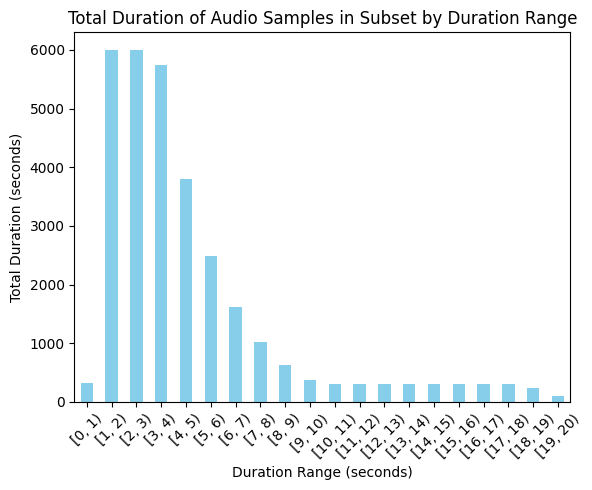

In [82]:
import matplotlib.pyplot as plt

# Calculate the total duration for each range
duration_per_range = subset.groupby('duration_range')['duration'].sum() / 60

# Plot the total duration for each range
duration_per_range.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Duration Range (seconds)')
plt.ylabel('Total Duration (seconds)')
plt.title('Total Duration of Audio Samples in Subset by Duration Range')

# Show the plot
plt.xticks(rotation=45)
plt.show()


In [81]:
# Randomly sample 5000 samples from the subset for validation set
validation_set = subset.sample(n=5000, random_state=42)

training_set = subset.drop(validation_set.index)

# Display the first few rows of the training set
training_set.head()

,path,text,speaker,duration,duration_range
287505,big_processed_data/Nguyễn_Văn_Khỏa/Thần_Thoại_...,hay là cụ không còn?,Nguyễn_Văn_Khỏa,0.96,"[0, 1)"
287513,big_processed_data/Diễm_Hân/Nhân_Tố_Enzyme/nha...,cung cấp môi trường.,Diễm_Hân,0.94,"[0, 1)"
287592,big_processed_data/Lê_Đức_Quân/Đối_Thoại_Với_M...,trong tim ta,Lê_Đức_Quân,0.70,"[0, 1)"
287597,big_processed_data/Meredith_Mclver/Trump_101:_...,câu hỏi,Meredith_Mclver,0.72,"[0, 1)"
287655,big_processed_data/Phúc_Lâm/Sức_Mạnh_Của_Động_...,anh sẽ phải chọn,Phúc_Lâm,0.82,"[0, 1)"


In [83]:
# Save the validation set to a file (e.g., validation.csv)
validation_set[['path', 'text', 'speaker']].to_csv(
    '/home/thivux/code/vinai/TTS/recipes/ljspeech/xtts_v2/SACHNOI/validation_500h.csv', index=False, header=['audio_file', 'text', 'speaker_name'],
    sep='|')

# Save the training set to a file (e.g., training.csv)
training_set[['path', 'text', 'speaker']].to_csv(
    '/home/thivux/code/vinai/TTS/recipes/ljspeech/xtts_v2/SACHNOI/train_500h.csv', index=False, header=['audio_file', 'text', 'speaker_name'], 
    sep='|')

In [80]:
samples = subset.sample(n=8*84)
a = samples[samples['duration'] < 3]['duration'].sum()
b = samples[samples['duration'] > 10]['duration'].sum()

a / b

3.9387906198113285